<a href="https://colab.research.google.com/github/NehaSabrin/Time_Series_Forecasting/blob/main/DVA_Demo_3_2_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings


In [ ]:
df=pd.read_csv('/content/Summary_of_Weather.csv')

<ipython-input-67-ccc91943120d>:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/Summary_of_Weather.csv')


For Time series

*   constant mean, constant variance (std deviation), constant auto coverience
*   train, validate, test (RMSC- root mean square(low rmsc low error)). Will teach in next demo
*   data should be date type
*   date should be our index
*   time



> 1 is for row & 0 is for column







In [ ]:
df

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
weather= df.loc[:,['STA','Date','MeanTemp']]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   MeanTemp  119040 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


<ipython-input-70-5549fad5de73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])


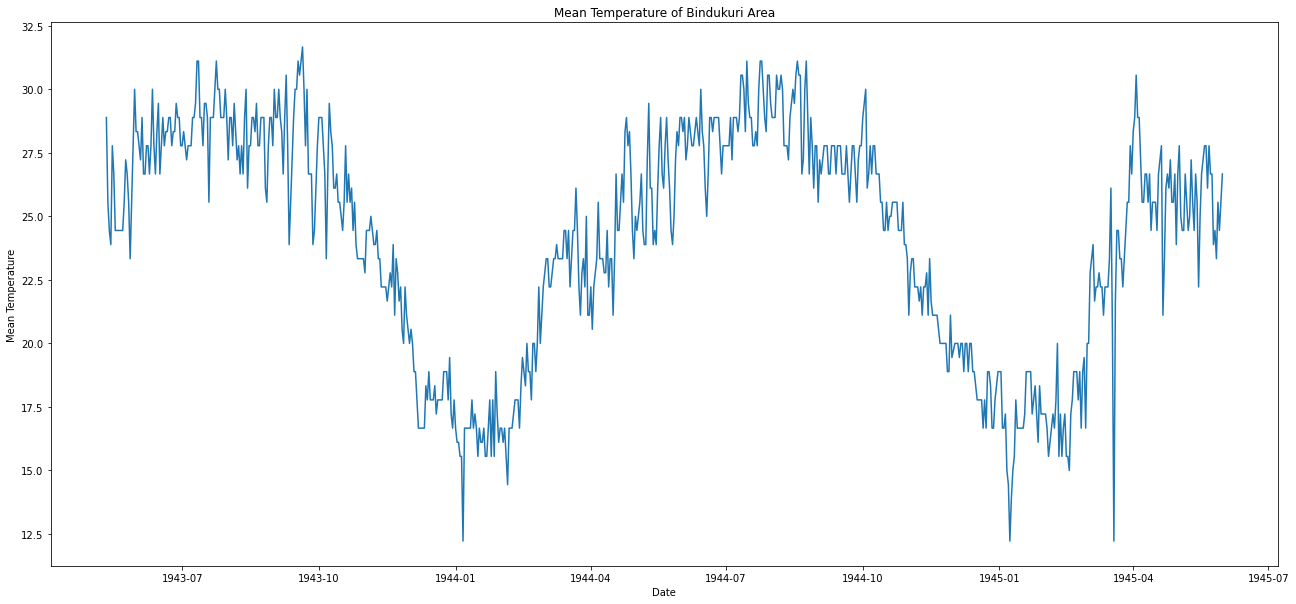

In [ ]:
weather_bin = weather.loc[weather.STA == 32907]
#print(weather_bin.info())
#print("---------------------------------------------------")
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
#print(weather_bin.info())

plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show();


Now lets check stationarity of time series. We can check stationarity using the following methods:
Plotting Rolling Statistics: We have a window, lets say window size is 6 and then we find rolling mean and variance to check stationarity.
Augumented Dickey-Fuller Test: The test results comprise of a Test Statistic(like T-test or Z-Test) and some Critical Values for different confidence levels. If the test statistic is less than the critical value, we can say that time series is stationary.


In [ ]:
# adfuller library  -> Augmented Dicky Fuller Test
from statsmodels.tsa.stattools import adfuller

# check_adfuller
def cal_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts) # Augmented Dicky Fuller Test
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    # result[2] -> usedlag , the number of lags used
    # result[3] -> nobs, The number of observations used for the regression and calculation of the critical values.
    print('Critical Values:' ,result[4])


In [ ]:
# check_mean_std
def plotting_rolling_stats(ts):
    #Rolling statistics
    rolmean = ts.rolling(6).mean()  # 6 is the window size
    rolstd = ts.rolling(6).std()

    plt.figure(figsize=(22,10))
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')

    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()


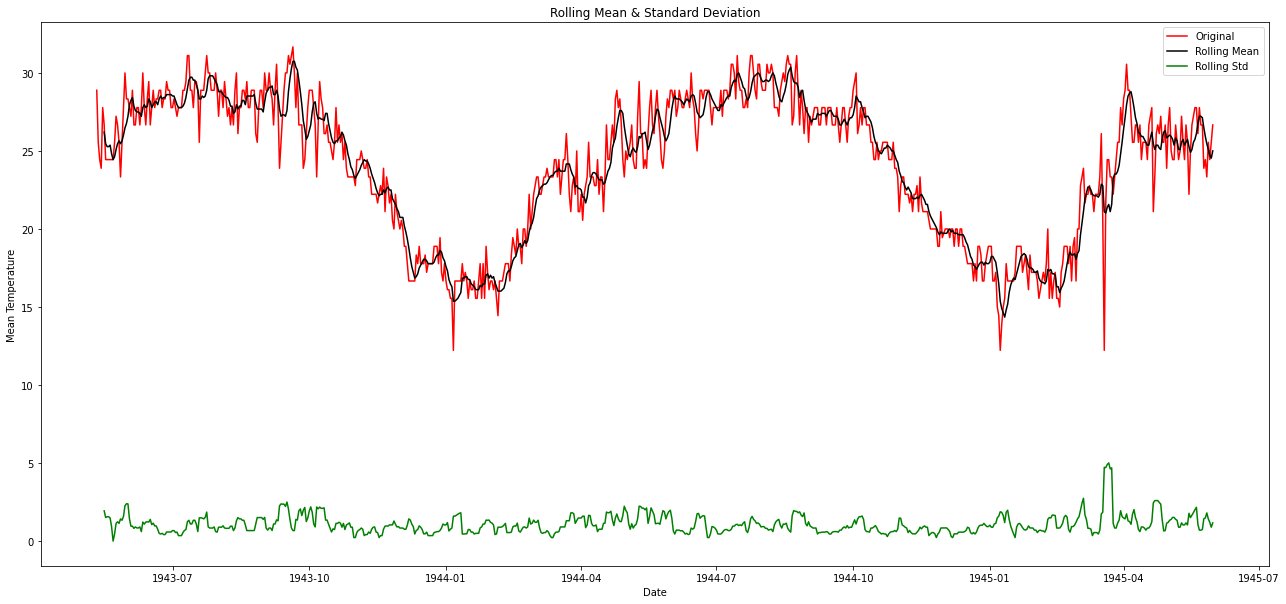

Test statistic:  -1.4095966745887756
p-value:  0.5776668028526357
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [ ]:
timeSeries = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)


# check stationary: mean, variance(std) and adfuller test
plotting_rolling_stats(ts)
cal_adfuller(ts.MeanTemp)


Observation


>


Our first criteria for stationary is constant mean. So we fail because mean is not constant as you can see from plot(black line) above . (not stationary)


>


Second one is constant variance. It looks like constant, as we see very low changes in variance. (yes stationary)


>


Third one is that If the test statistic is less than the critical value, we can say that time series is stationary. Lets look: test statistic = -1.4 and critical values = {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}. Test statistic is bigger than the critical values. (not stationary)


>



> H0 = TS is not stationary

> H1 = TS is stationary


>



> Test stat < critical value => Reject H0 => TS is stationary

> Test stat > critical value => Fail to Reject H0 => TS is not stationary


Multiple test that can used to check time serie stationary


> ADF [Augmented Dikkiy Fuller Test]

> KPSS

> PP [







In [ ]:
train=pd.read_csv('/content/AirPassengers.csv')

train.timestamp = pd.to_datetime(train.Month)
train.index = train.timestamp
train.drop('Month',axis = 1, inplace = True)

#looking at the first few rows
train.info()
train.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<ipython-input-74-cdafdbe86477>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.timestamp = pd.to_datetime(train.Month)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


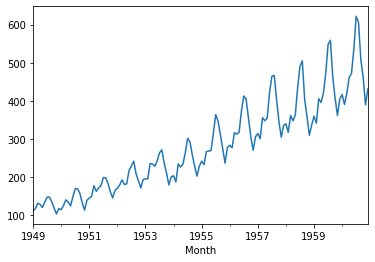

In [ ]:
train['#Passengers'].plot();

Seasonal Differencing
In seasonal differencing, instead of calculating the difference between consecutive values, we calculate the difference between an observation and a previous observation from the same season. For example, an observation taken on a Monday will be subtracted from an observation taken on the previous Monday.


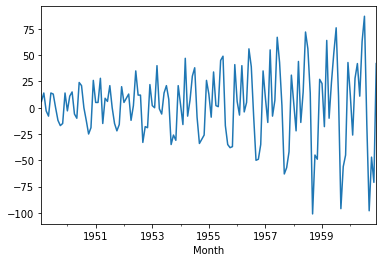

In [ ]:
n = 7
train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift()
train['#Passengers_diff'].dropna().plot();


Transformation Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform.
transformation is something very similar to Normalizing data


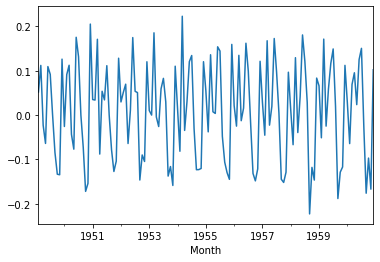

In [ ]:
train['#Passengers_log'] = np.log(train['#Passengers'])

train['#Passengers_log_diff'] = train['#Passengers_log'] - train['#Passengers_log'].shift(1)

train['#Passengers_log_diff'].dropna().plot();


Train, Validate & Test

In [ ]:
series=pd.read_csv('/content/yearly-water-usage.csv',index_col=0)  #index_col=0 to make year into index
series.head()

,Water
Year,
1885,356
1886,386
1887,397
1888,397
1889,413


We must develop a test harness(i.e a test data) to investigate the data and evaluate candidate models.


This involves two steps:

Defining a Validation Dataset.

Developing a Method for Model Evaluation.

1. Validation Dataset

The dataset is not current. This means that we cannot easily collect updated data to validate the model.

Therefore, we will pretend that it is 1953 and withhold the last 10 years of data from analysis and model selection.

This final decade of data will be used to validate the final model.

The code below will load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv).


In [ ]:
from pandas import read_csv

split_point = len(series) - 10

dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

# You need to be careful. As Colab may not allow to save some files, as indicated in below code.
# Request the Trainer to give his dataset.csv and validation.csv
# Please Note : The below code definetely runs on Local PC in Jupyter.
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)


Dataset 69, Validation 10


*2. Model Evaluation*

Model evaluation will only be performed on the data in dataset.csv prepared in the previous section.

Model evaluation involves two elements:

> 1. Performance Measure.

> 2. Test Strategy.

*2. 1 Performance Measure*

We will evaluate the performance of predictions using the *`root mean squared error (RMSE).`*

This gives us a `baseline`, that the Model we make should atleast have less or equal to RMSE

*schematic of the code :*

`from sklearn.metrics import mean_squared_error
from math import sqrt
...
test = ...
predictions = ...
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)`


2.2 Test Strategy

Candidate models will be evaluated using walk-forward validation. (In walk-forward validation method each time step in the test dataset will be enumerated, a model constructed on history data, and the forecast compared to the expected value. The observation will then be added to the training dataset and the process repeated. Walk-Forward validation creates a rolling-forecast type model as well it is a realistic way to evaluate time series forecast models as one would expect models to be updated as new observations are made available.)


A rolling-forecast type model is best for Time series. This is where one-step forecasts are needed given all available data.

The walk-forward validation will work as follows:

The first 50% of the dataset will be used to train the model.

The remaining 50% of the dataset will be iterated to test the model.

For each step in the test dataset: (see code sample below first)

A model will be trained.

A one-step prediction made and the prediction stored for later evaluation.

The actual observation from the test dataset will be added to the training dataset for the next iteration.

The predictions made during the enumeration of the test dataset will be evaluated and an RMSE score reported.

Given the small size of the data, we will allow a model to be re-trained given all available data prior to each prediction.



In [ ]:
# prepare data. spliting into train and test set
X = series.values
X = X.astype('float32')
# Always convert a loaded dataset to float32 in case the loaded data
# still has some String or Integer data types.

train_size = int(len(X) * 0.50)

train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	yhat = history[-1] # using the last i.e 69th record to predict 70th record
	predictions.append(yhat)

    # observation
	obs = test[i]
	history.append(obs)
	print('>Predicted= ' ,yhat, 'Expected= ', obs)


>Predicted=  [492.] Expected=  [503.]
>Predicted=  [503.] Expected=  [503.]
>Predicted=  [503.] Expected=  [450.]
>Predicted=  [450.] Expected=  [432.]
>Predicted=  [432.] Expected=  [432.]
>Predicted=  [432.] Expected=  [458.]
>Predicted=  [458.] Expected=  [462.]
>Predicted=  [462.] Expected=  [503.]
>Predicted=  [503.] Expected=  [488.]
>Predicted=  [488.] Expected=  [466.]
>Predicted=  [466.] Expected=  [492.]
>Predicted=  [492.] Expected=  [503.]
>Predicted=  [503.] Expected=  [515.]
>Predicted=  [515.] Expected=  [500.]
>Predicted=  [500.] Expected=  [522.]
>Predicted=  [522.] Expected=  [575.]
>Predicted=  [575.] Expected=  [583.]
>Predicted=  [583.] Expected=  [587.]
>Predicted=  [587.] Expected=  [628.]
>Predicted=  [628.] Expected=  [640.]
>Predicted=  [640.] Expected=  [609.]
>Predicted=  [609.] Expected=  [606.]
>Predicted=  [606.] Expected=  [632.]
>Predicted=  [632.] Expected=  [617.]
>Predicted=  [617.] Expected=  [613.]
>Predicted=  [613.] Expected=  [598.]
>Predicted= 

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [ ]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [ ]:
train_original=train.copy()
test_original=test.copy()


In [ ]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [ ]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [ ]:
train.shape, test.shape

((18288, 3), (5112, 2))

We have ID, Datetime, and the corresponding count of passengers in the training file. For the test file we have ID and Datetime only so we have to predict the Count for the test file.

Let’s understand each feature first:

ID is the unique number given to each observation point.

Datetime is the time of each observation.

The count is the passenger count corresponding to each Datetime.


Feature Extraction

We will extract the time and date from the Datetime. We have seen earlier that the data type of Datetime is an object. So first of all we have to change the data type to DateTime format otherwise we can not extract features from it.


In [ ]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

We made some hypothesis for the effect of the hour, day, month, and year on the passenger count. So, let’s extract the year, month, day, and hour from the Datetime to validate our hypothesis.

In [ ]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour


In [ ]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2


<ipython-input-90-990595f1b95a>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=train.drop('ID',1)


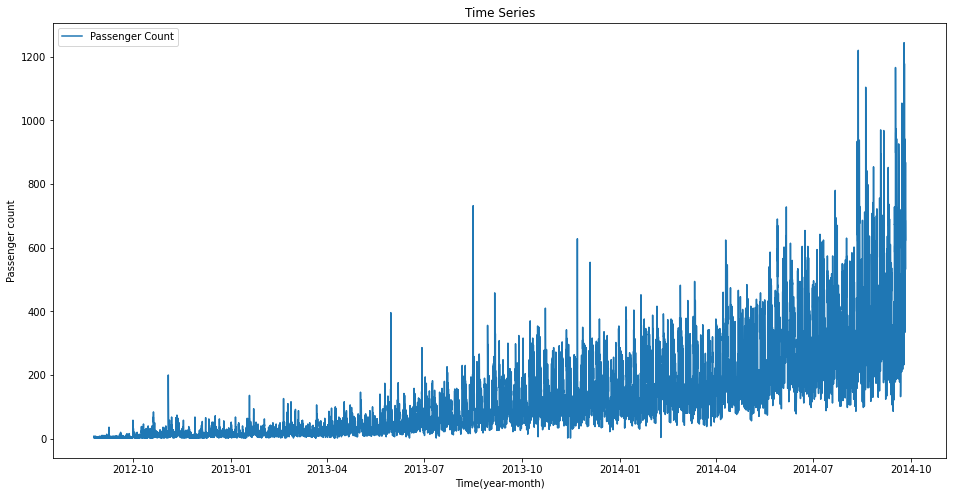

In [ ]:
#Let’s look at the time series.
train.index = train['Datetime']
df=train.drop('ID',1)
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')


Here we can infer that there is an increasing trend in the series, i.e., the number of counts is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on a particular day, due to some event the traffic was high.



Exploratory Analysis Let us try to verify our hypothesis using the actual data.

Our first hypothesis was traffic will increase as the years pass by. So let’s look at the yearly passenger count.


<Axes: xlabel='year'>

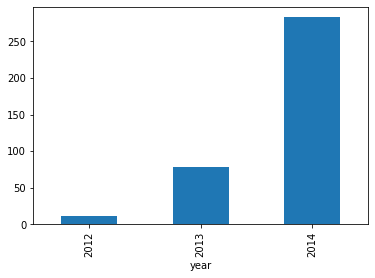

In [ ]:
train.groupby('year')['Count'].mean().plot.bar()


<Axes: xlabel='month'>

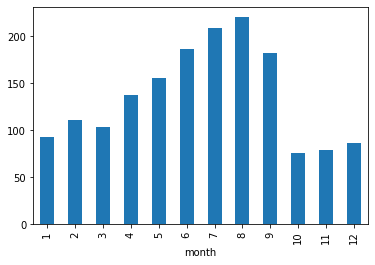

In [ ]:
train.groupby('month')['Count'].mean().plot.bar()


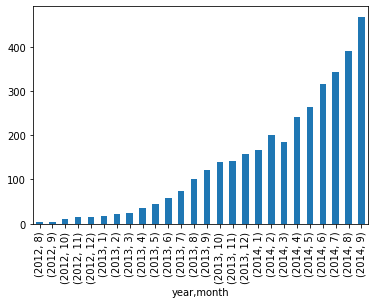

In [ ]:
temp=train.groupby(['year','month'])['Count'].mean().plot.bar()



<Axes: xlabel='day'>

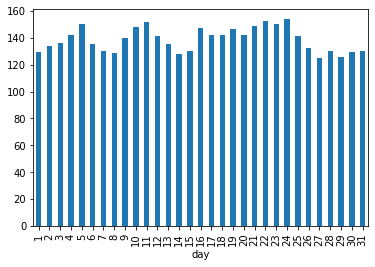

In [ ]:
train.groupby('day')['Count'].mean().plot.bar()


Unable to asume

<Axes: xlabel='Hour'>

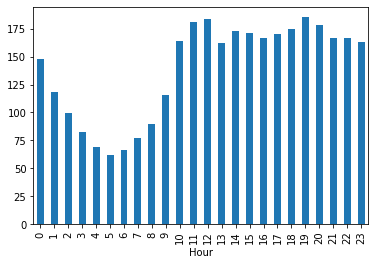

In [ ]:
train.groupby('Hour')['Count'].mean().plot.bar()


<Axes: xlabel='weekend'>

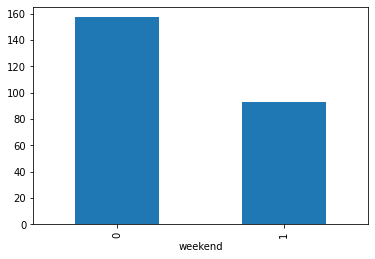

In [ ]:
train.groupby('weekend')['Count'].mean().plot.bar()


<Axes: xlabel='day of week'>

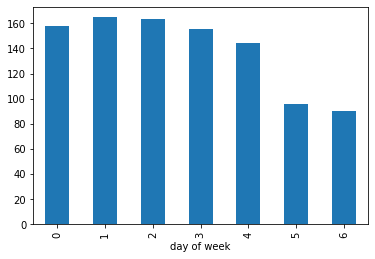

In [ ]:
train['day of week']=train['Datetime'].dt.dayofweek
train.groupby('day of week')['Count'].mean().plot.bar()


In [ ]:
train=train.drop('ID',1)

<ipython-input-98-a67628b49454>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train=train.drop('ID',1)


As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series into daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

In [ ]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()


<ipython-input-99-350388c96620>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')


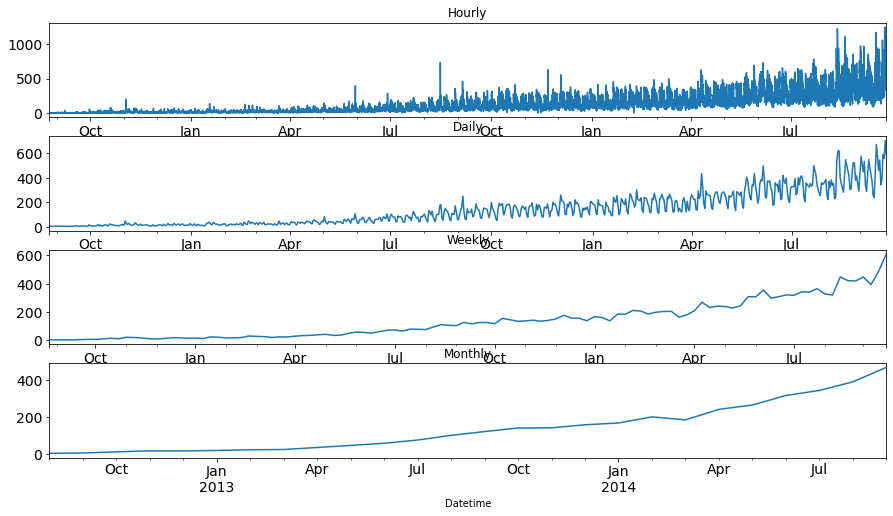

In [ ]:
#Let’s look at the hourly, daily, weekly, and monthly time series.
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])
plt.show()


But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily, and daily to hourly predictions, which will become a very expanded process. So, we will work on the daily time series.

In [ ]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test.index = test.Timestamp
test = test.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp
train = train.resample('D').mean()


<ipython-input-101-6489ee311a10>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')


In [ ]:
Train=train.loc['2012-08-25':'2014-06-24']
valid=train.loc['2014-06-25':'2014-09-25']


1) Splitting the data into the training and validation part

Now we will divide our data into train and validation. We will make a model on the train part and predict on the validation part to check the accuracy of our predictions.

To divide the data into training and validation sets, we will take the last 3 months as the validation data and the rest as training data. We will take only 3 months as the trend will be the most in them. If we take more than 3 months for the validation set, our training set will have fewer data points as the total duration is of 25 months. So, it will be a good choice to take 3 months for the validation set.

The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.


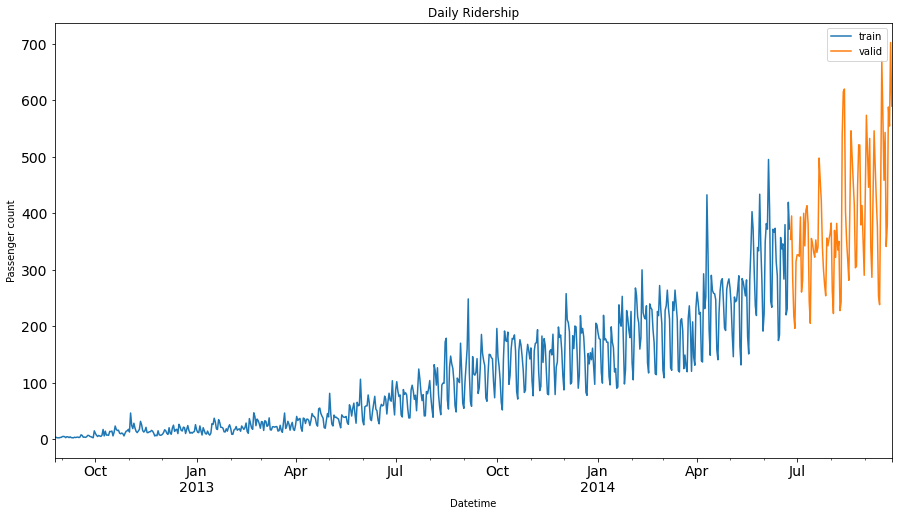

In [ ]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()


split data in train and validation

In [ ]:
Train=train.loc['2012-08-25':'2014-06-24']
valid=train.loc['2014-06-25':'2014-09-25']

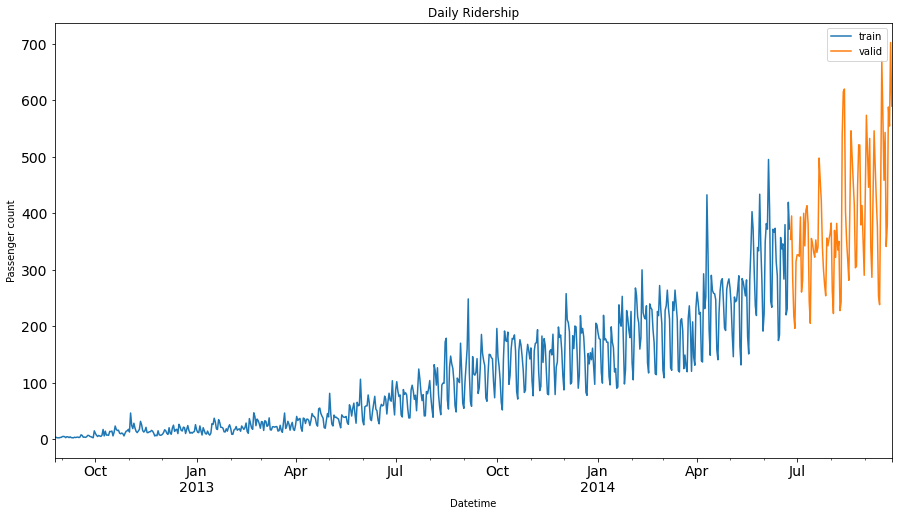

In [ ]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()


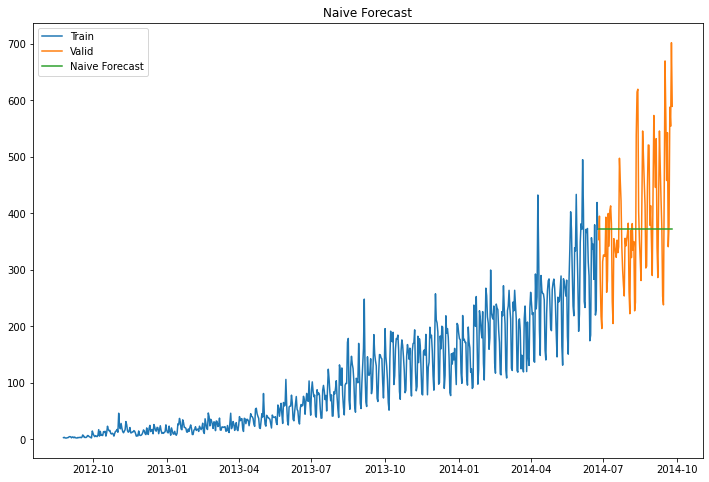

In [ ]:
dd= np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index,valid['Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)


111.79050467496724


Moving average Taking average

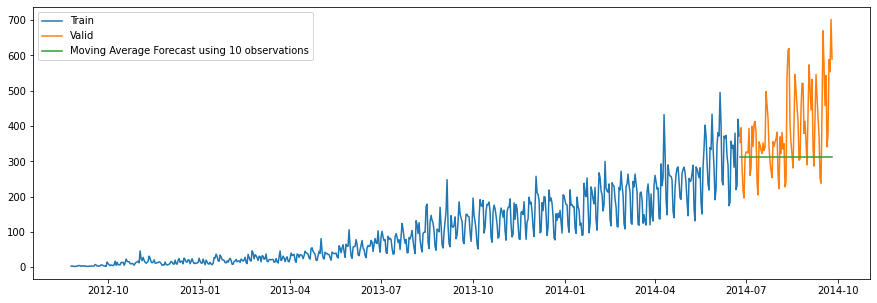

In [ ]:
#Let’s try the rolling mean for the last 10, 20, and 50 days and visualize the results.
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],
                label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()


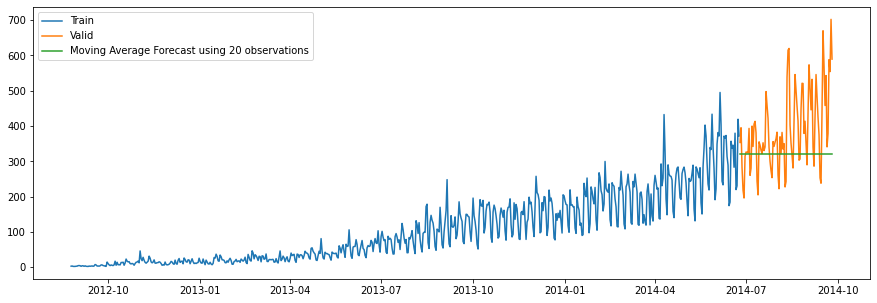

In [ ]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],
                label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()


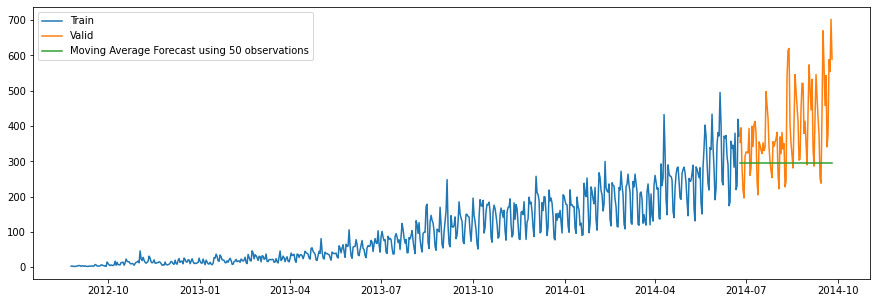

In [ ]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],
                    label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()


In [ ]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
print(rms)


144.19175679986793


Simple exponantial smoothing method

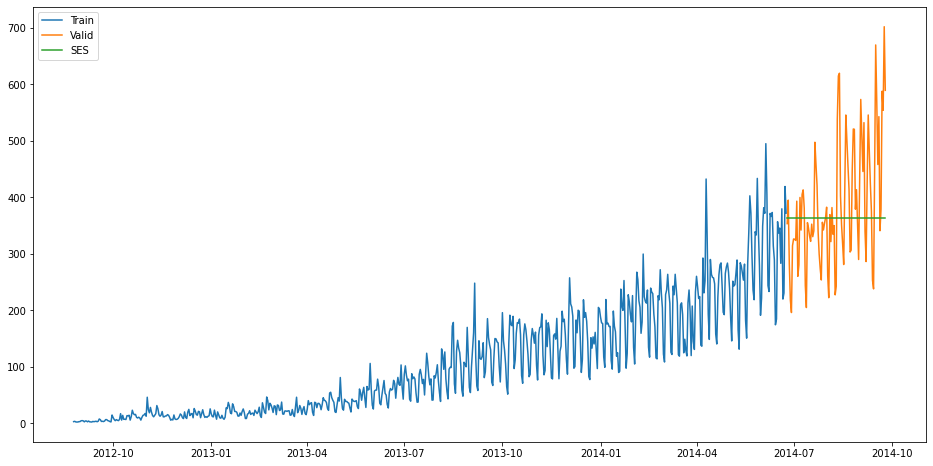

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,
        optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


In [ ]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
print(rms)

113.43708111884514


Holt's Linear trend mode


>Observed, which is the original time series.

Trend, which shows the trend in the time series, i.e., increasing or decreasing behavior of the time series.

Seasonal, which tells us about the seasonality in the time series.

Residual, which is obtained by removing any trend or seasonality in the time series.




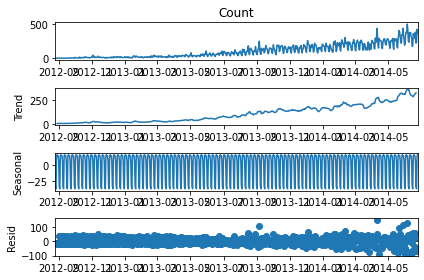

In [ ]:
#Let’s visualize all these parts.

import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()


<ipython-input-115-d0fced52835f>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,


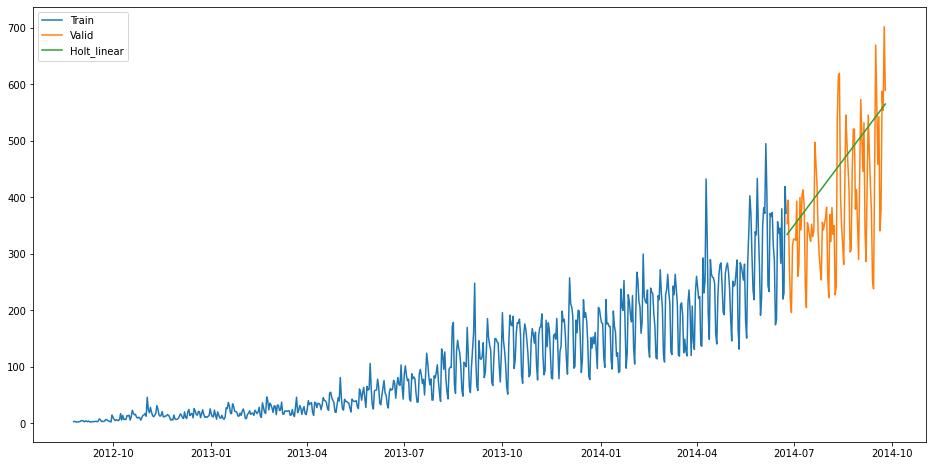

In [ ]:

#An increasing trend can be seen in the dataset, so now we will make a model based on the trend.

y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,
        smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()


We can see an inclined line here as the model has taken into consideration the trend of the time series.


In [ ]:

#Let’s calculate the rmse of the model.

rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)


112.94278345314041


In [ ]:
predict = fit1.forecast(len(test))
test['predict'] = predict
test.head()


,ID,year,month,day,Hour,predict
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,334.650767
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,337.159011
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,339.667256
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,342.175500
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,344.683745


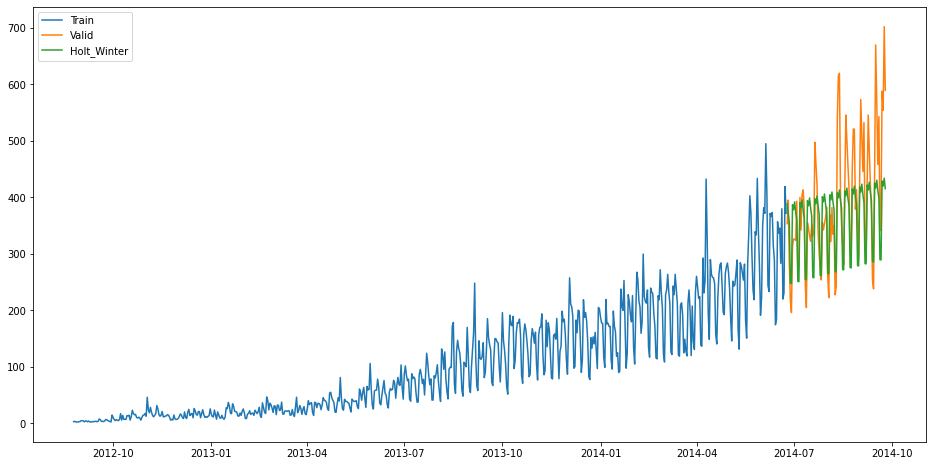

RMSE =  81.94569995693239


In [ ]:
y_hat_avg = valid.copy()
fit1= ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods=7, trend='add', seasonal='add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(Train['Count'], label= 'Train' )
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['Holt_Winter'], label = 'Holt_Winter')
plt.legend()
plt.show()
print('RMSE = ', sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter)))


In [ ]:
predict = fit1.forecast(len(test))
test['predict'] = predict
test.head()


,ID,year,month,day,Hour,predict
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,388.682012
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,370.221105
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,356.592483
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,247.878083
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,247.429383


ARIMA (Auto Regression Integrated Moving Average) model

There are 3 ordered parameter (p,d,q)
p is the ordered autoregression model (no. of time lags)
d differencing
q is the order of moving average model. We will discuss

>ACF - Auto-Correlation Function
>PACF - Partial Auto-Correlation Function



In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):        #Function to calculate the results of the Dickey-Fuller test.

    #Determining rolling Statistics for 24 hours on each day
    rolmean = pd.Series(timeseries).rolling(window=24).mean()
    rolstd = pd.Series(timeseries).rolling(window=244).std()


    #Plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block= False)

    # Dickey-Fuller Test
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)



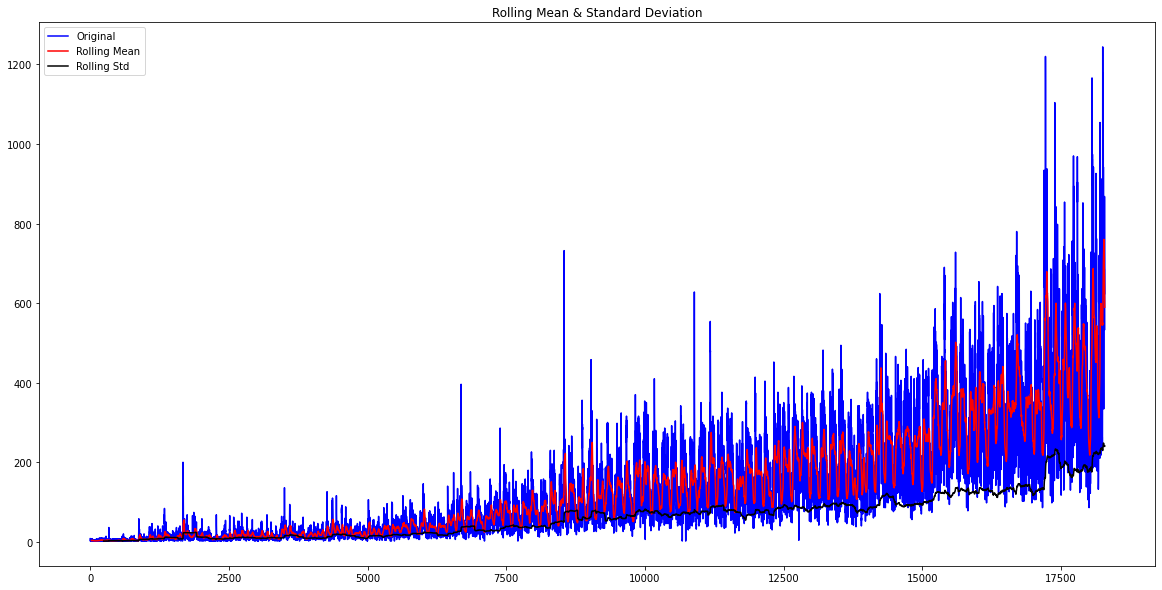

Results of Dickey-Fuller test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

test_stationarity(train_original['Count'])


Test Statistic less then critical value, so the time series is stationary.

We will make it more stationary by removing the trends

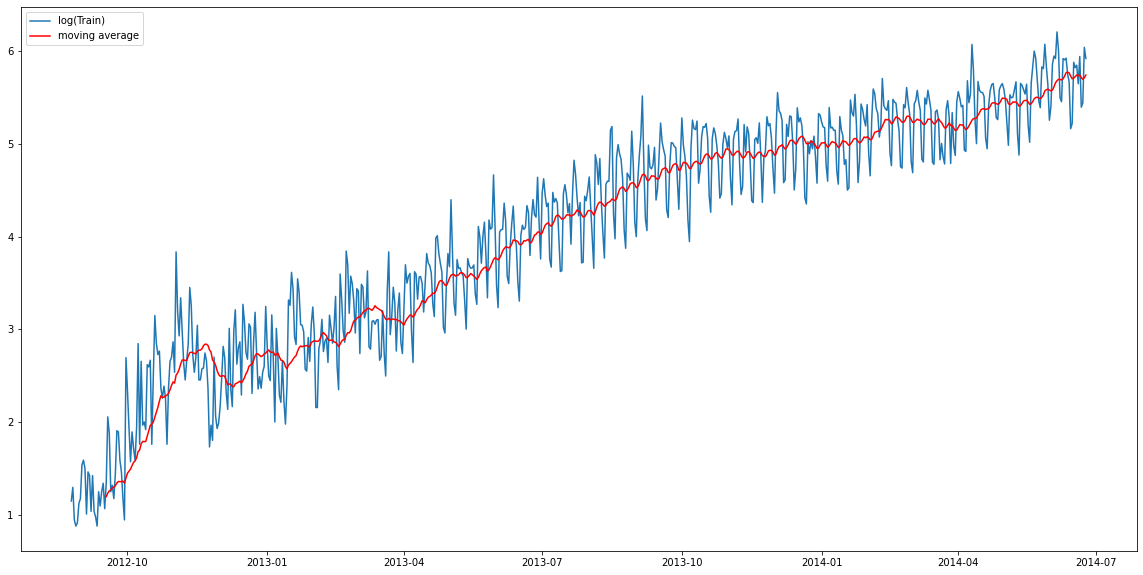

In [ ]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log, label = 'log(Train)')
plt.plot(moving_avg, color = 'Red', label = 'moving average')
plt.legend()
plt.show()


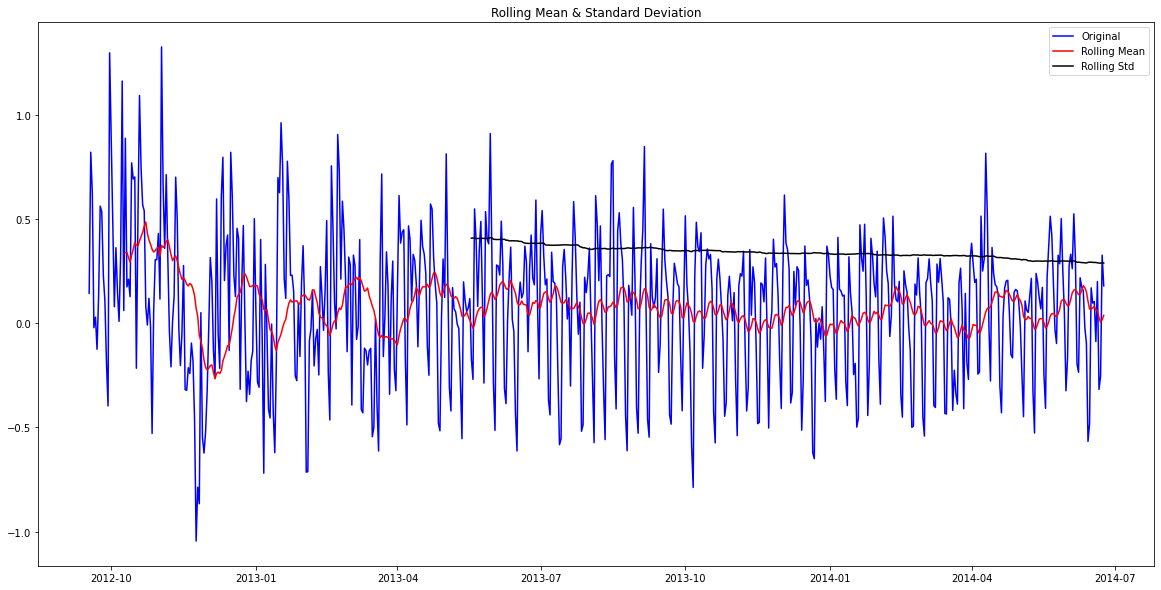

Results of Dickey-Fuller test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [ ]:
train_log_moving_avg_diff = Train_log - moving_avg

train_log_moving_avg_diff.dropna(inplace = True)    # Dropping Null Values

test_stationarity(train_log_moving_avg_diff)


By moving average, the trend is removed. Therfore the Test Statistic decrease to make more stationary

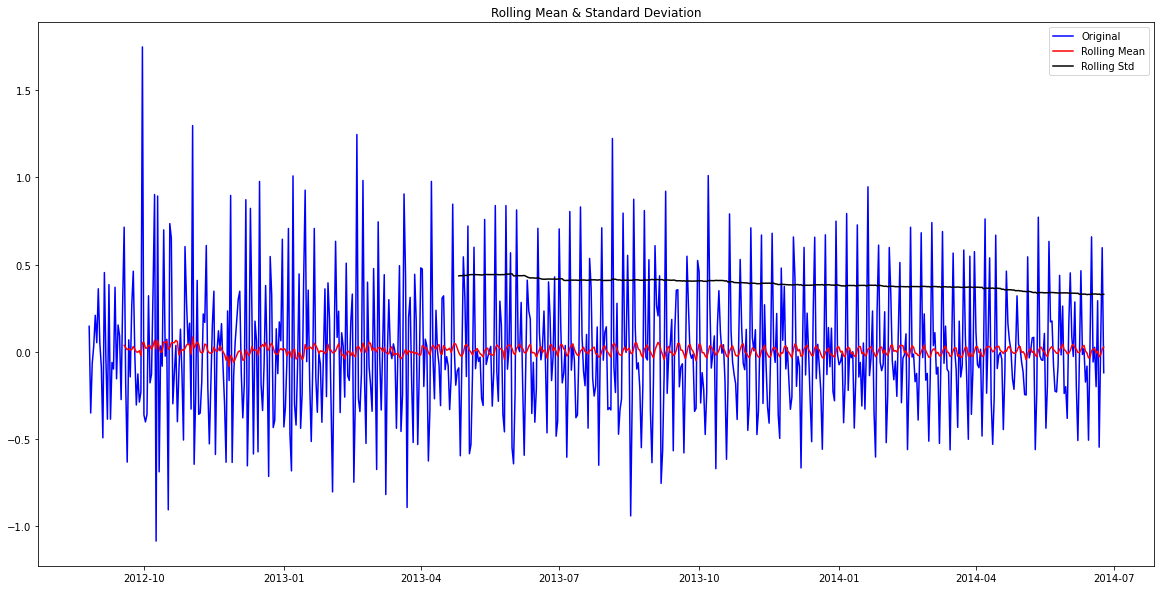

Results of Dickey-Fuller test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [ ]:
train_log_diff = Train_log  - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())


After stabelising the mean it is more stationary

Decompose the time series sesonability

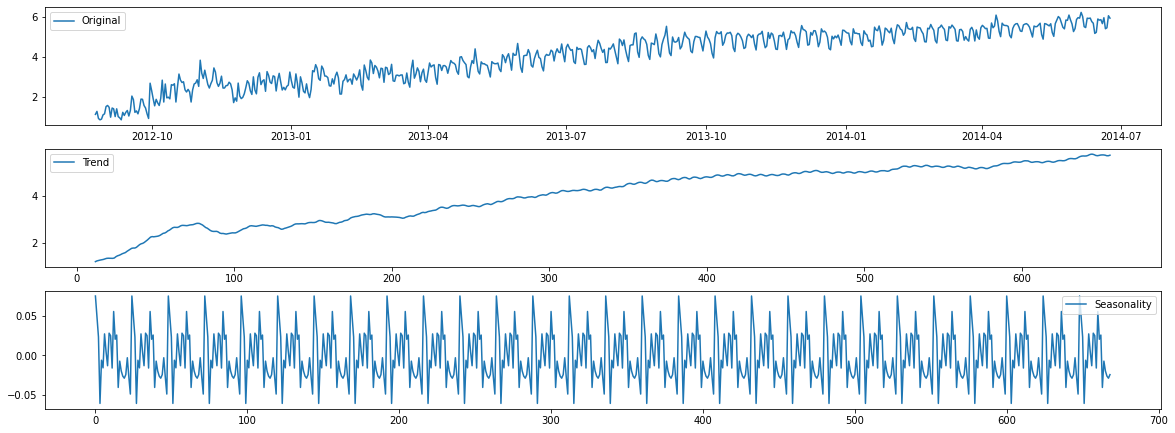

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, period= 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label = 'Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')


To find the optimal value of p,d,q we use 2 graph ACF &PACF

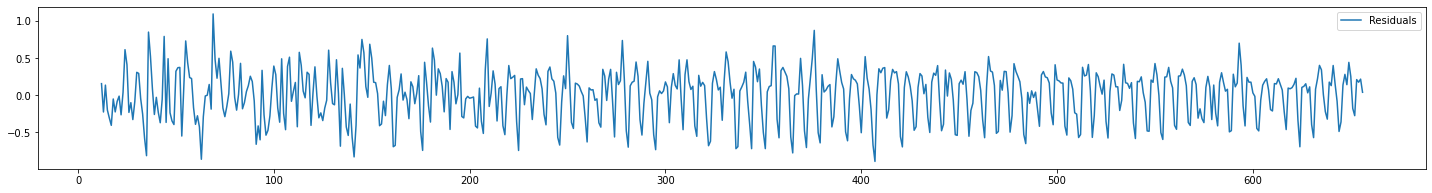

In [ ]:
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


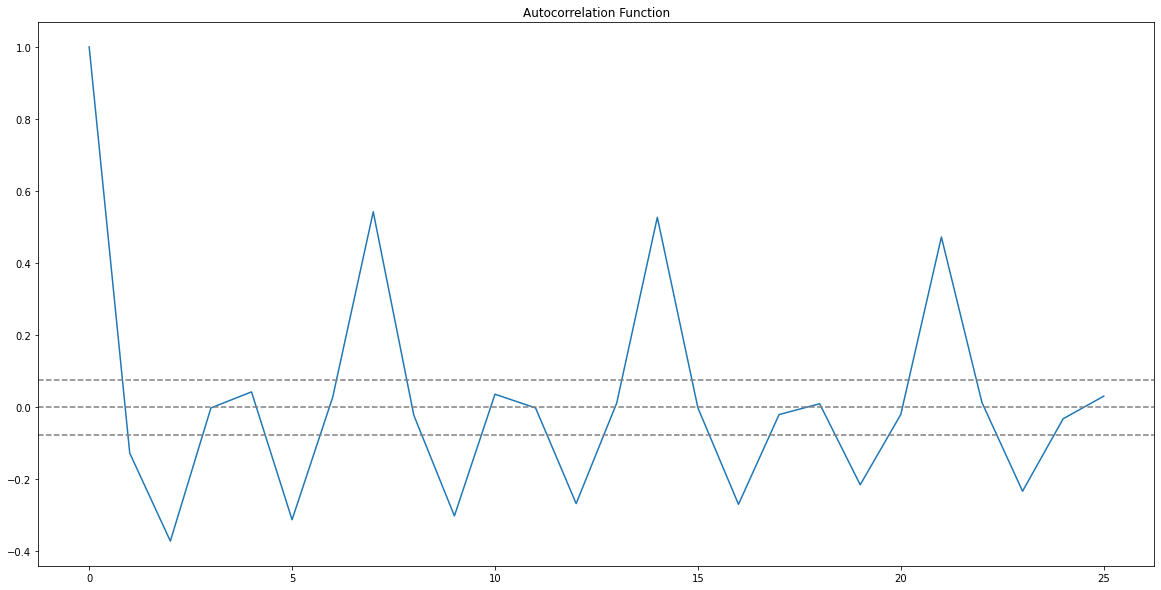

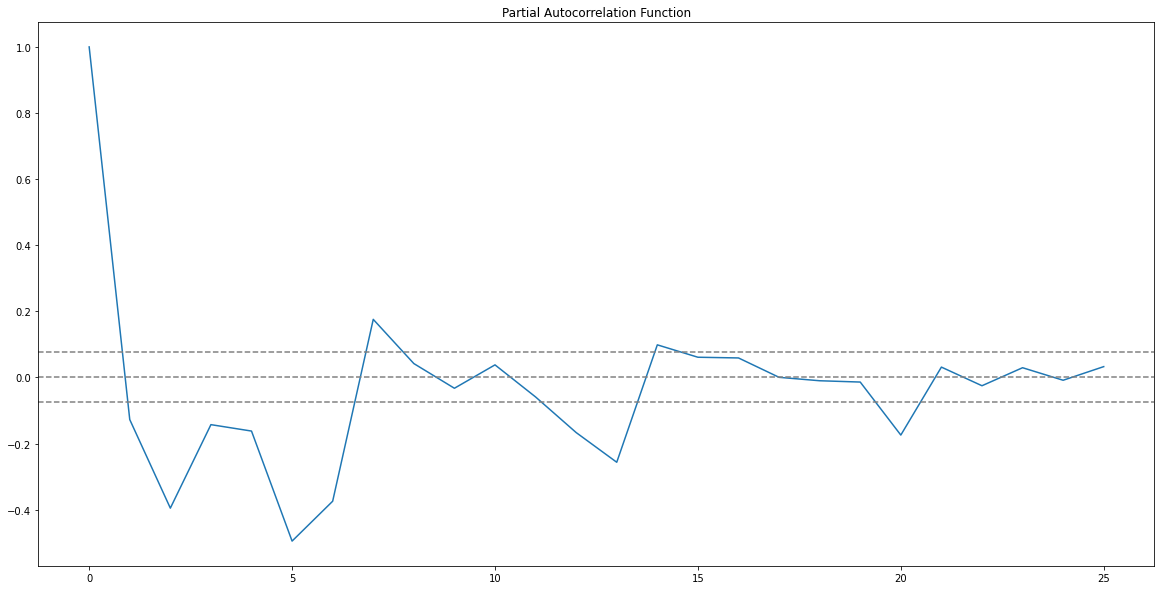

In [ ]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(train_log_diff.dropna(), nlags= 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method = 'ols')

plt.plot(lag_acf)
plt.axhline(y = 0, linestyle ='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')


plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()



p=1, q=1

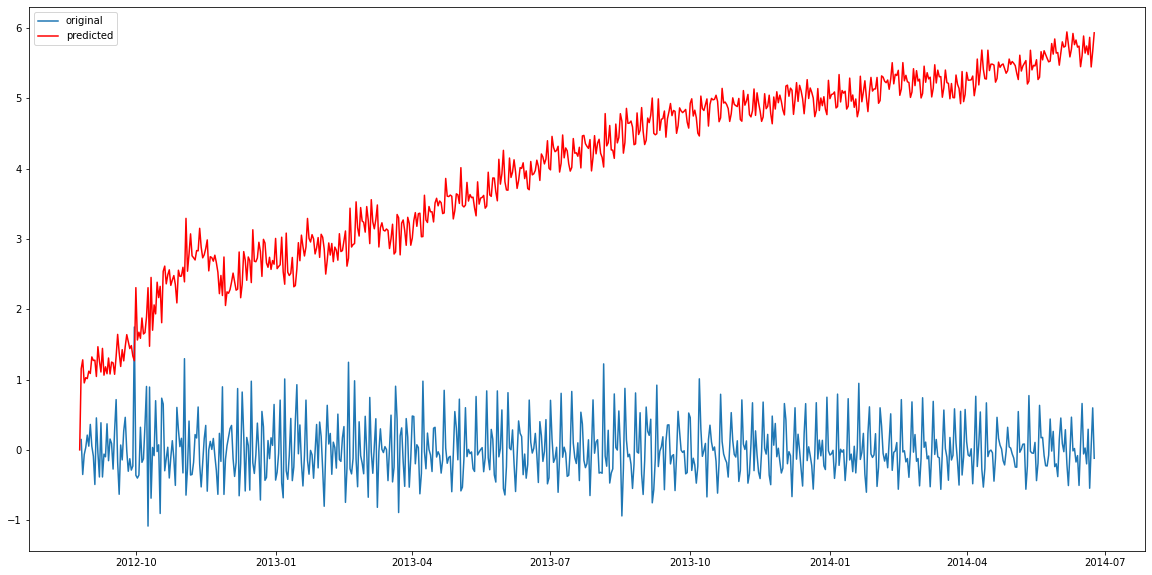

In [ ]:

#ARIMA model
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

model = ARIMA(Train_log, order=(2, 1, 2))
results_ARIMA = model.fit()
plt.plot(train_log_diff.dropna(),  label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()
